In [1]:
import os
import glob
from tqdm import tqdm

import numpy as np
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import matplotlib.colors as mcolors

from astropy.io import fits

os.environ["PYSYN_CDBS"]='/Users/abbyboehm/reference_data/pysynphot/grp/redcat/trds'
import pysynphot as S

from Cthulhu.misc import read_cross_section_file
from Cthulhu.core import summon, compute_cross_section
from Cthulhu.VALD import process_VALD_file

/Users/abbyboehm/opt/anaconda3/envs/lair/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /Users/abbyboehm/reference_data/pysynphot/grp/redcat/trds/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/Users/abbyboehm/opt/anaconda3/envs/lair/lib/python3.9/site-packages/pysynphot/refs.py:117: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for /Users/abbyboehm/reference_data/pysynphot/grp/redcat/trds/mtab/*_tmg.fits
  warnings.warn('No graph or component tables found; '
/Users/abbyboehm/opt/anaconda3/envs/lair/lib/python3.9/site-packages/pysynphot/refs.py:124: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /Users/abbyboehm/reference_data/pysynphot/grp/redcat/trds/mtab/*_tmt.fits
  warnings.warn('No thermal tables found, '


The following three cells are what I used to generate my 1 nbar, 1000 K cross sections for the atomic species of interest in our work. They take quite a while to run and require a bit of set-up to make happen. In particular, the atomic cross sections require that you get a VALD account and request all the relevant datasets first. I have gone ahead and saved the results of all of this rigmarole out into cross-sections.npy, which I have supplied alongside this notebook. Feel free to skip the next three cells and simply load the numpy dictionary that I have provided, unless you want to change the cross section data at all, in which case more power to you.

Due to the size of the full cross-section dict, I cannot upload that file to GitHub. So if you want to remake the plot of GJ 367's spectrum, you will have to produce the cross-sections yourself. That is unfortunate. You can still make every other plot in the paper though, just comment out any sections that reference the full_cross_dict variable.

In [2]:
### GETTING ATOMIC CROSS-SECTIONS FROM THE OLD ONE ###
atoms = ('S','C','O','Na','K')
state = 1
state_str = '_I'
database = 'VALD'
for atom in tqdm(atoms, desc='Computing atomic cross-sections with Cthulhu...'):
    nu_min = 1000                   # 1/cm
    nu_max = 100000                 # 1/cm
    process_VALD_file(species = atom, ionization_state = state, VALD_data_dir = './VALD_Line_Lists/')
    summon(database=database, species = atom, VALD_data_dir='./VALD_Line_Lists/', ionization_state = state)

    P = 1e-9                        # Pressure in bars
    T = 1000.0                      # Temperature in Kelvin
    input_directory = './input/'    # Top level directory containing line lists

    compute_cross_section(database=database, species = atom, pressure = P,
                            temperature = T, input_dir = input_directory,
                            ionization_state = state, nu_out_min=nu_min, nu_out_max=nu_max,
                            verbose=True, N_cores=7)

Computing atomic cross-sections with Cthulhu...:   0%|          | 0/5 [00:00<?, ?it/s]

This file took 0.2 seconds to reformat to HDF.

 ***** Processing requested data from VALD. You have chosen the following parameters: ***** 

Atom: S 
Ionization State: 1

Line list ready.

Beginning cross-section computations...
Loading VALD format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 4.495200147 s
Pre-computation steps complete
Generating cross section for S I at P = 1e-09 bar, T = 1000.0 K
Calculation complete!
Completed 24257 transitions in 1.8158573370000006 s



Computing atomic cross-sections with Cthulhu...:  20%|██        | 1/5 [00:15<01:03, 15.87s/it]

Total runtime: 15.403575725000001 s
This file took 0.1 seconds to reformat to HDF.

 ***** Processing requested data from VALD. You have chosen the following parameters: ***** 

Atom: C 
Ionization State: 1

Line list ready.

Beginning cross-section computations...
Loading VALD format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 3.3071835640000025 s
Pre-computation steps complete
Generating cross section for C I at P = 1e-09 bar, T = 1000.0 K
Calculation complete!
Completed 14318 transitions in 0.04139333400000211 s



Computing atomic cross-sections with Cthulhu...:  40%|████      | 2/5 [00:28<00:41, 13.79s/it]

Total runtime: 12.08317992 s
This file took 0.1 seconds to reformat to HDF.

 ***** Processing requested data from VALD. You have chosen the following parameters: ***** 

Atom: O 
Ionization State: 1

Line list ready.

Beginning cross-section computations...
Loading VALD format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 1.7023664089999997 s
Pre-computation steps complete
Generating cross section for O I at P = 1e-09 bar, T = 1000.0 K
Calculation complete!
Completed 7780 transitions in 0.033328572999998585 s



Computing atomic cross-sections with Cthulhu...:  60%|██████    | 3/5 [00:38<00:24, 12.40s/it]

Total runtime: 10.596538510999999 s
This file took 0.0 seconds to reformat to HDF.

 ***** Processing requested data from VALD. You have chosen the following parameters: ***** 

Atom: Na 
Ionization State: 1

Line list ready.

Beginning cross-section computations...
Loading VALD format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 110.352564578 s
Pre-computation steps complete
Generating cross section for Na I at P = 1e-09 bar, T = 1000.0 K
Calculation complete!
Completed 1200 transitions in 20.465810973999993 s



Computing atomic cross-sections with Cthulhu...:  80%|████████  | 4/5 [03:02<01:04, 64.03s/it]

Total runtime: 141.007286347 s
This file took 0.1 seconds to reformat to HDF.

 ***** Processing requested data from VALD. You have chosen the following parameters: ***** 

Atom: K 
Ionization State: 1

Line list ready.

Beginning cross-section computations...
Loading VALD format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 202.96195732799998 s
Pre-computation steps complete
Generating cross section for K I at P = 1e-09 bar, T = 1000.0 K
Calculation complete!
Completed 2367 transitions in 45.64131247500001 s



Computing atomic cross-sections with Cthulhu...: 100%|██████████| 5/5 [07:23<00:00, 88.74s/it] 

Total runtime: 258.875277519 s


In [3]:
### GETTING THE CROSS SECTIONS TO USE FOR THE REST OF THIS NOTEBOOK ###
absorption_dict = {}
full_cross_dict = {}

P = 1e-9
T = 1000


atoms = ('C','O','Na','S','K')
masses = (12.011,15.999,22.990,32.065,39.098)
database = 'VALD'
for k in tqdm(range(len(atoms)),desc='Getting atomic cross sections...'):
    atom = atoms[k]
    mass = masses[k]
    state = 1
    state_str = '_I'
    
    # These read out in 1/cm, cm^2
    nu, sigma = read_cross_section_file(species=atom,database=database,ionization_state=state,
                                        filename=atom+state_str+"_T"+"{:.1F}".format(T)+"K_log_P"+str(round(np.log10(P),1))+"_H2-He_sigma.txt")

    # Convert wavenumbers in 1/cm to wavelengths in micron
    waves = np.asarray([10*1000/i for i in nu]) # in um

    full_cross_dict[atom+state_str] = [waves,sigma,mass]

    # Take the strongest line available on the 0.1-10 um range,
    # but bin it down to comparable to resolution elements.
    max_index = np.argmax(sigma)
    if atom+state_str == 'S_I':
        # Hardcoding to pull on the 180.7311 nm line instead, since it is NIST-verified
        max_index = (np.abs(waves - 0.1807311)).argmin()
    max_wave = waves[max_index]

    # For the C, O, S lines, I'm opting for a resolution element of ~0.1 AA.
    # The COS grisms and STIS Echelles can reach dispersions of 0.01 AA per pixel,
    # but I want to bin several resolution elements to increase SNR.
    lower_wave = max_wave - 0.5e-5 # - 0.05 AA
    upper_wave = max_wave + 0.5e-5 # + 0.05 AA

    # For the Na and K lines, I'm going for 2 nm instead.
    # WFC3/UVIS, WFC3/IR, and STIS/IR M/L grisms reach similar or smaller dispersions,
    # but you always want some binning for SNR.
    if atom+state_str in ("Na_I","K_I"):
        lower_wave = max_wave - 1e-3 # - 1nm
        upper_wave = max_wave + 1e-3 # + 1nm

    upper_index = (np.abs(waves - lower_wave)).argmin()
    lower_index = (np.abs(waves - upper_wave)).argmin()
    print("Getting cross section over {:.0F} indices from wavelengths {:.3F} to {:.3F} AA.".format(np.abs(upper_index - lower_index),
                                                                                                          lower_wave*1e4,
                                                                                                          upper_wave*1e4))
    max_sigma = sigma[lower_index:upper_index]
    max_waves = waves[lower_index:upper_index]
        
    # Define the bandpass in micron
    wmin, wmax = (np.min(max_waves),np.max(max_waves))
    band = wmax - wmin

    # Retrieve the average cross-section on this range
    sec = np.mean(max_sigma)#-1*np.trapz(max_sigma,x=max_waves)/band
    wave = np.median(max_waves)
    hw = 0.5*(np.max(max_waves)-np.min(max_waves))

    print("Maximum cross section for {} at index {}, wavenumber {:.0F} cm^-1, wavelength {:.0F} nm.".format(atom+state_str,
                                                                                                            max_index,
                                                                                                            (10*1000)/wave,
                                                                                                            wave*1000))
    absorption_dict[atom+state_str] = [wave,sec,hw,mass]

Getting atomic cross sections...:  20%|██        | 1/5 [00:13<00:53, 13.30s/it]

Getting cross section over 364 indices from wavelengths 1656.958 to 1657.058 AA.
Maximum cross section for C_I at index 5934974, wavenumber 60350 cm^-1, wavelength 166 nm.


Getting atomic cross sections...:  40%|████      | 2/5 [00:26<00:39, 13.19s/it]

Getting cross section over 590 indices from wavelengths 1302.118 to 1302.218 AA.
Maximum cross section for O_I at index 7579501, wavenumber 76795 cm^-1, wavelength 130 nm.


Getting atomic cross sections...:  60%|██████    | 3/5 [00:40<00:27, 13.53s/it]

Getting cross section over 5762 indices from wavelengths 5881.582 to 5901.582 AA.
Maximum cross section for Na_I at index 1597337, wavenumber 16973 cm^-1, wavelength 589 nm.


Getting atomic cross sections...:  80%|████████  | 4/5 [00:52<00:13, 13.11s/it]

Getting cross section over 306 indices from wavelengths 1807.261 to 1807.361 AA.
Maximum cross section for S_I at index 5433082, wavenumber 55331 cm^-1, wavelength 181 nm.


Getting atomic cross sections...: 100%|██████████| 5/5 [01:06<00:00, 13.22s/it]

Getting cross section over 3402 indices from wavelengths 7657.007 to 7677.007 AA.
Maximum cross section for K_I at index 1204290, wavenumber 13043 cm^-1, wavelength 767 nm.


In [47]:
# Make binned_down absorption dict.
bin_cross_dict = {}
for spec in tqdm(list(full_cross_dict.keys()),
                desc='Fixing cross sections...'):
    wave, sigma, mass = full_cross_dict[spec]
    wave = np.array([i for i in list(reversed(wave))])
    sigma = np.array([i for i in list(reversed(sigma))])

    # Get binned down version, where binning elements are 0.1 AA = 0.01 nm < 300 nm, and 2 nm > 300 nm.
    lam_step = 1e-5
    bin_w, bin_sig = [],[]
    lam0 = 0.1
    j = 0
    J = 0
    while lam0 < 1.0:
        ok = (wave>lam0) & (wave<lam0+lam_step)
        bin_w.append(np.mean(wave[ok]))
        bin_sig.append(np.mean(sigma[ok]))
        lam0 += lam_step
        if lam0 > 0.3:
            lam_step = 2e-3
        j += 1
        J += 1
        if j % 2000 == 0:
            print(spec, J, lam0, lam_step)
            j = 0

    bin_cross_dict[spec] = [np.array(bin_w),np.array(bin_sig),mass]

Fixing cross sections...:   0%|          | 0/5 [00:00<?, ?it/s]

C_I 2000 0.11999999999999225 1e-05
C_I 4000 0.14000000000000531 1e-05
C_I 6000 0.16000000000002532 1e-05
C_I 8000 0.18000000000004532 1e-05
C_I 10000 0.20000000000006532 1e-05
C_I 12000 0.22000000000008532 1e-05
C_I 14000 0.24000000000010532 1e-05
C_I 16000 0.2600000000001253 1e-05
C_I 18000 0.2800000000001453 1e-05
C_I 20000 0.3000000000001653 0.002


Fixing cross sections...:  20%|██        | 1/5 [07:13<28:53, 433.26s/it]

O_I 2000 0.11999999999999225 1e-05
O_I 4000 0.14000000000000531 1e-05
O_I 6000 0.16000000000002532 1e-05
O_I 8000 0.18000000000004532 1e-05
O_I 10000 0.20000000000006532 1e-05
O_I 12000 0.22000000000008532 1e-05
O_I 14000 0.24000000000010532 1e-05
O_I 16000 0.2600000000001253 1e-05
O_I 18000 0.2800000000001453 1e-05
O_I 20000 0.3000000000001653 0.002


Fixing cross sections...:  40%|████      | 2/5 [14:29<21:44, 434.86s/it]

Na_I 2000 0.11999999999999225 1e-05
Na_I 4000 0.14000000000000531 1e-05
Na_I 6000 0.16000000000002532 1e-05
Na_I 8000 0.18000000000004532 1e-05
Na_I 10000 0.20000000000006532 1e-05
Na_I 12000 0.22000000000008532 1e-05
Na_I 14000 0.24000000000010532 1e-05
Na_I 16000 0.2600000000001253 1e-05
Na_I 18000 0.2800000000001453 1e-05
Na_I 20000 0.3000000000001653 0.002


Fixing cross sections...:  60%|██████    | 3/5 [21:16<14:04, 422.42s/it]

S_I 2000 0.11999999999999225 1e-05
S_I 4000 0.14000000000000531 1e-05
S_I 6000 0.16000000000002532 1e-05
S_I 8000 0.18000000000004532 1e-05
S_I 10000 0.20000000000006532 1e-05
S_I 12000 0.22000000000008532 1e-05
S_I 14000 0.24000000000010532 1e-05
S_I 16000 0.2600000000001253 1e-05
S_I 18000 0.2800000000001453 1e-05
S_I 20000 0.3000000000001653 0.002


Fixing cross sections...:  80%|████████  | 4/5 [28:02<06:55, 415.89s/it]

K_I 2000 0.11999999999999225 1e-05
K_I 4000 0.14000000000000531 1e-05
K_I 6000 0.16000000000002532 1e-05
K_I 8000 0.18000000000004532 1e-05
K_I 10000 0.20000000000006532 1e-05
K_I 12000 0.22000000000008532 1e-05
K_I 14000 0.24000000000010532 1e-05
K_I 16000 0.2600000000001253 1e-05
K_I 18000 0.2800000000001453 1e-05
K_I 20000 0.3000000000001653 0.002


Fixing cross sections...: 100%|██████████| 5/5 [34:49<00:00, 417.86s/it]


In [49]:
### CONFIRMING I GOT WHAT I NEEDED AND SAVING OUT ###
for key in list(absorption_dict.keys()):
    wave, sig, hw, mass = absorption_dict[key]
    print('{}: peaks at {:.0F}+/-{:.3F} nm with cross-section {:.2E} cm^2'.format(key,1000*wave,1000*hw,sig))

filename = 'cross-sections.npy'
np.save(filename,absorption_dict)
filename = 'cross-sections-full.npy'
np.save(filename,full_cross_dict)
filename = 'cross-sections-bin.npy'
np.save(filename,bin_cross_dict)

C_I: peaks at 166+/-0.005 nm with cross-section 1.51E-14 cm^2
O_I: peaks at 130+/-0.005 nm with cross-section 5.27E-15 cm^2
Na_I: peaks at 589+/-1.000 nm with cross-section 1.41E-14 cm^2
S_I: peaks at 181+/-0.005 nm with cross-section 3.12E-14 cm^2
K_I: peaks at 767+/-1.000 nm with cross-section 1.76E-14 cm^2


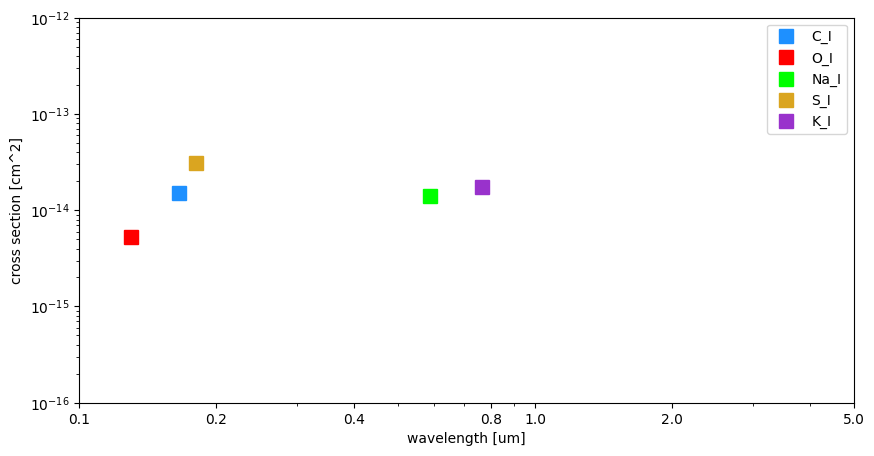

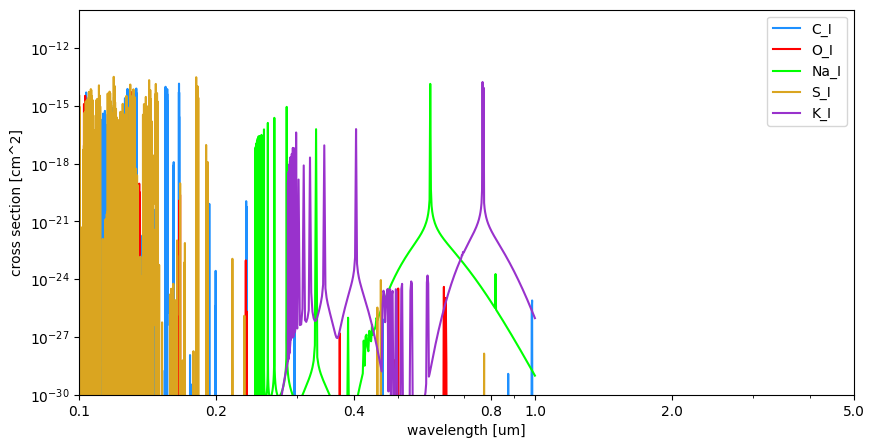

In [50]:
### LOADING AND PLOTTING ###
filename = 'cross-sections.npy'
absorption_dict = np.load(filename,allow_pickle=True).item()

filename = 'cross-sections-full.npy'
full_cross_dict = np.load(filename,allow_pickle=True).item()

filename = 'cross-sections-bin.npy'
bin_cross_dict = np.load(filename,allow_pickle=True).item()

atoms = ('C','O','Na','S','K')
colors = ('dodgerblue','red','lime','goldenrod','darkorchid')

plt.figure(figsize=(10,5))
for atom, color in zip(atoms,colors):
    lam, sigma, hws, mass = absorption_dict[atom+"_I"]
    plt.errorbar(lam,sigma,xerr=hws,marker='s',markersize=10,ls='none',label=atom+"_I",color=color)

plt.xlabel('wavelength [um]')
plt.ylabel('cross section [cm^2]')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right')
plt.xlim(0.1,5)
plt.xticks(ticks=[0.1,0.2,0.4,0.8,1.0,2.0,5.0],#,10.0],
           labels=['{:.1F}'.format(i) for i in [0.1,0.2,0.4,0.8,1.0,2.0,5.0]])#,10.0]])
plt.ylim((1e-16,1e-12))
plt.show()
plt.close()

plt.figure(figsize=(10,5))
for atom, color in zip(atoms,colors):
    lam, sigma, mass = bin_cross_dict[atom+"_I"]
    plt.plot(lam,sigma,label=atom+"_I",color=color)

plt.xlabel('wavelength [um]')
plt.ylabel('cross section [cm^2]')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right')
plt.xlim(0.1,5)
plt.xticks(ticks=[0.1,0.2,0.4,0.8,1.0,2.0,5.0],#,10.0],
           labels=['{:.1F}'.format(i) for i in [0.1,0.2,0.4,0.8,1.0,2.0,5.0]])#,10.0]])
plt.ylim((1e-30,1e-10))
plt.show()
plt.close()

In [51]:
### CONSTANTS OF LENGTH ###
au      = 1.496e13  # cm
rads    = 6.957e10  # cm
rade    = 6.371e8   # cm

### CONSTANTS OF TIME ###
day     = 86400     # s
year    = 3.1536e7  # s

### CONSTANTS OF MASS ###
masss   = 1.989e33  # g
masse   = 5.9722e27 # g
amu     = 1.66e-24  # g

### OTHER CONSTANTS ###
G       = 6.6743e-8 # dyne cm^2 g^-2
kB      = 1.381e-16 # erg K^-1
pi      = np.pi     # no dims
mu0     = 1/(8*pi)  # g cm^-1 s^-2, cgs version of (1 Gauss)^2 / 2 mu0

### PLANETS WE ARE INTERESTED IN ###
tois = ['GJ 1132 b', 'GJ 367 b', 'GJ 486 b',
        'GJ 9827 b', 'GJ 9827 c', 'HD 23472 d',
        'HD 23472 e', 'HD 23472 f', 'HD 260655 b',
        'HD 63433 d', 'K2-36 b', 'Kepler-102 b',
        'Kepler-102 c', 'Kepler-102 d', 'L 168-9 b',
        'L 98-59 b', 'LHS 1678 b', 'TOI-238 b']

best = ['GJ 367 b',]

### PLOTTING STUFF ###
fontsize_axis = 16
fontsize_tick = 14

In [113]:
### EQUATIONS ###
def torus_volume(a, H, n=3):
    # Torus volume assuming the torus spans n scale heights and starts at r_inner = a.
    r = n*H/2
    R = a + r
    return (pi*(r**2))*(2*pi*R)

def torus_mass(n, m, V):
    # Torus mass based on isotropic mass distribution.
    return n*m*V

def volc(tau, M):
    # Torus supply rate based on the torus mass and how long it takes to escape from the torus.
    return M/tau

def number_dens(fs, H, sig, n=3):
    # Number density which produces an absorption signature of fs in a torus of n scale heights for absorbers of size sig.
    ds = n*H
    return fs/(sig*ds)

def scale_height(T, m, Omega):
    # Plasma diffusion scale height, used here to approximate the scale radius.
    return np.sqrt((2/3)*kB*T/(m*(Omega**2)))

def get_teq(aoR,Teff):
    # 0-albedo equilibrium temperature, needed for scale height.
    return Teff*((1/4)**(1/4))/(aoR**0.5)

def lifetime(aoR, RA, Omega):
    # Minimum torus reservoir lifespan based on uninhibited magnetospheric convection.
    return np.sqrt(2/3)*((RA/aoR)**2)*(1/Omega)

def vesc(m, r):
    # Escape velocity.
    return np.sqrt(2*G*m/r)

def eta_star(b, r, wind, vinf):
    # Eta*, the wind magnetic confinement parameter, which is dimensionless.
    return ((b**2)*mu0)*(r**2)/(wind*vinf)

def _residuals(ra, eta):
    # Residual function, see below.
    lhs = ra**4 - ra**3
    return (lhs-eta)**2

def get_alfven(eta):
    # Owocki 2009 Alfven radius solver.
    results = minimize(_residuals,np.array([20,]),args=(eta,))
    return results.x[0]

def empirical_mass(r):
    # The Chen & Kipping 2017 / Louie et al. 2018 mass-radius relations. Useful if you don't have a planet mass measurement on hand.
    emp_m = 0.9718*(r**3.58)
    if r > 1.23:
        emp_m = 1.436*(r**1.70)
    return emp_m

def get_tidal_power(p,rp,e):
    # Seligman et al. 2024 tidal power relation, scaled by the unknown quality factor.
    return (3.4*1e27)*(p**-5)*(rp**5)*((e/0.01)**2)

Some assumptions:
I typically take the stellar B to be 500 G. This is my attempt to compromise between the mild B fields of G stars (~100 G) and the extreme B fields of M stars (1 kG or more). For M stars in our sample, consider B to be possibly underestimated. For G stars, consider B to be possibly overestimated. As most of the stars in our sample are K and M stars, erring on the side of slightly-higher-than-G-star seems reasonable.
I also usually take the wind loss rate to be 10^-14 solar masses per year based on our own solar wind. This is usually an underestimate for earlier types of stars, but we won't encounter too many F- or A-orbiting targets here anyhow.

Rationale for how to pick the planets off of Exoplanet Archive (performed Nov 2024 so numbers may change when you try this):
To do these calculations, you have to have a stellar rotation rate, otherwise you will not be able to get a lifetime. So you need to enable that column, and set it to >0 so that we only get stars for which this is measured. This cuts the available targets down to 890. This is a big cut because not many people measure this value, since you normally don't need to know about it.

You are also going to need a known stellar mass, radius, and effective temperature, for getting the eta* parameter that helps you solve for the Alfven radius. Set all of those >0. Target N should fall to 795. These measurements are common so this cut is small.

You need to know the planet's semimajor axis in order to determine if it is inside the Alfven radius. So set orbit semimajor axis >0. The targets are now down to 617.

Since we are interested in outgassing from volcanically-active terrestrial planets, it won't benefit us to include large radii planets. Set planetary radius to bounds [0.0,1.60]. The number of targets is now 87. This is another big cut, because small planets are hard to find.

You could, at this point, make a few extra cuts if you wanted:

a. You could cut on mass to ensure it is terrestrial (e.g. < 4.0ME), but I use the empirical relation when there's no known mass.

b. You could cut on equilibrium temperature to ensure it's not a ball of lava (e.g. T < 1500 K), but I think it's worth looking at ultra-hot rocks.

c. You could cut on eccentricity > 0 to ensure tidal heating, but I think it's worth acknowledging non-eccentric targets that could be intensely volcanic anyhow, i.e. super young planets.

d. You could cut on number of planets in the system to ensure multiplanetary systems only, but it's worth looking at single targets anyhow because they probably aren't really alone.

e. You could also cut on whether or not this is the default parameter set. If you do that, it drops us to 41 available targets. I instead prefer to take all options, and then pick and choose between the planets that have duplicate entries.

At this stage, I take my targets. The columns I need to have are:

N planets in system

Whether it has been detected in RVs, which tells us how good the ecc measurement is

Planet parameter reference, again useful for knowing whether the ecc measurement is good

Planet name

Planet orbit semimajor axis

Planet orbit period, needed if you are going to compute tidal heating rates

Planet radius

Planet mass

Planet eccentricity, which may be unknown

Planet equilibrium temperature, which may be unknown

Stellar radius

Stellar mass

Stellar effective temperature

Stellar rotation period

System V magnitude

I attached my table to the GitHub so you can quickly recreate this, but also, you should play around with it, see what else is out there. Some notes on special treatments I made:
1. LHS 1815 b is in my table as the Gan+ 2020 entry, but I used the better mass constraint from Luque+ 2022.
2. KOI 4777.01 has a weird mass measurement of <99 Earth masses on the archive, but their paper says it's meant to be <0.34 Earth masses. I think someone entered something wrong, so I replaced the data entry there with the correct upper bound.
3. Kepler-107 c makes it through all the checks but the mass measurements are really weird, like 2x iron density weird. I toss this target for safety's sake.
4. LHS 1678 b and c have two retrieved entries, Silverstein+ 2022 and 2024. I took the 2024 one since its ecc measurements had bounds, not just upper limits.
4. GJ 367 b retrieved two entries, Goffo+ 2023 and Lam+ 2021. Goffo+ 2023 is the default parameter set so I nabbed it.
5. GJ 486 b retrieved two entries, Trifonov+ 2021 and Caballero+ 2022. It did not collect the most recent set, Weiner Mansfield+ 2024, because that one didn't make a P_rot measurement for the star. I took most of the info from Weiner Mansfield+ 2024, subbing P_rot with Caballero+ 2022 data.
6. The GJ 9827 system had a plethora of measurements come up. Only Bonomo+ 2023 tried to estimate the eccentricity, so I took that one. It's only an upper bound though, so it's not particularly robust. But it is a multiplanetary system so that can be good for long-lived eccentricity.
7. K2-141 b had a Bonomo+ 2023 entry as well so I took that.
8. K2-36 b was the same as above.
9. The L 98-59 system was supplied entirely by Demangeon+ 2024.
10. LHS 1140 c retrieved Ment+ 2019 and Cadieux+ 2024. The latter was taken as it is the default parameter set.
11. For GJ 1132 b, I use the info from Xue+ 2024, except the stellar rotation which I get from Bonfils+ 2018.
12. For HD 93963 A b, I use the info from Polanski+ 2024, except the stellar rotation which I get from Serrano+ 2022.
13. For HIP 29442 b and c, I use the info from Egger+ 2024, except the stellar rotation which I get from Damasso+ 2023.
14. For K2-233 b and c, I use the info from Lillo-Box+ 2020, except the stellar rotation which I get from David+ 2018. Since they are both oddly massive by these studies, I let them go.
15. For the TOI-700 system, I use Gilbert+ 2023 for most parameters, and Gilbert+ 2020 for the stellar rotation.
16. For TRAPPIST-1, I use Agol+ 2021 for most parameters, Gillon+ 2016 for the stellar rotation, and Grimm+ 2018 for the eccentricity.

In [114]:
# Read in our table.
data = pd.read_excel('plasma_planets3.xlsx',header=96)
print(list(data.keys())) # check that we got the header row right, this should say stuff like 'pl_name'

['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'rv_flag', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'st_rotp', 'st_rotperr1', 'st_rotperr2', 'st_rotplim', 'sy_refname

Now let's establish the workflow. We have x number of planets that we need to make some calculations for, as follows:
1. Compute vinf
2. Compute eta*
3. Solve for RA
4. Determine tau
5. Determine tidal heating, where applicable

Then, for each absorbing species and desired absorption strength:
1. Determine number density needed to produce absorption
2. Determine torus steady state mass with that number density
3. Determine torus mass input to sustain that steady state mass

In [115]:
### VALUES THAT I AM ASSUMING ###
stellar_B = 500 # gauss, built into the mu0 value
wind_mass = (1e-14)*masss/year # g/s

In [116]:
### BIG WRAPPER FUNCTIONS ###
def process_planet(pdata,k):
    # 0. Some useful numbers
    aor = (au/rads)*(pdata['pl_orbsmax'][k]/pdata['st_rad'][k])
    if pdata['pl_name'][k] == 'Io':
        aor = 6 # units for Io are a bit funky: R* is supposed to be Jupiter radius
    omega = 2*pi/(day*pdata['st_rotp'][k])
    Teff=pdata['st_teff'][k]
    teq = get_teq(aoR=aor,Teff=Teff)
    if pdata['pl_name'][k] == 'Io':
        teq = 110 # Io is orbiting Jupiter which is orbiting the Sun which really sets Teq
    ecc_err = [pdata['pl_orbeccenerr1'][k],pdata['pl_orbeccenerr2'][k]]
    V = pdata['sy_vmag'][k]

    # 1. Compute vinf
    vinf = vesc(m=masss*pdata['st_mass'][k],
                r=rads*pdata['st_rad'][k])
    
    # 2. Compute eta*
    eta = eta_star(b=stellar_B,
                   r=rads*pdata['st_rad'][k],
                   wind=wind_mass,
                   vinf=vinf)
    
    # 3. Solve for RA
    alfven = get_alfven(eta=eta)
    if pdata['pl_name'][k] == 'Io':
        alfven = 20

    # 4. Determine torus lifetime
    tau = lifetime(aoR=aor,
                   RA=alfven,
                   Omega=omega)
    if pdata['pl_name'][k] == 'Io':
        tau = 50*day # 50 days is chosen since 20 to 80 days is the range of tau measured for Io and (20+80)/2 = 50
    
    # 5. Determine tidal heating, where applicable
    tides = 0
    if all(not np.isnan(x) for x in (pdata['pl_orbper'][k],pdata['pl_rade'][k],pdata['pl_orbeccen'][k])):
        tides = get_tidal_power(pdata['pl_orbper'][k],pdata['pl_rade'][k],pdata['pl_orbeccen'][k])
        if np.isnan(tides):
            tides = 0
        if not np.isfinite(tides):
            tides = 0
    if pdata['pl_name'][k] == 'Io':
        tides = 1.6e21 # from Seligman+ 2024
    
    # Trim any planets that have weird masses
    pmass = pdata['pl_bmasse'][k]
    if (np.isnan(pmass) or pmass == 0):
        pmass = empirical_mass(r=pdata['pl_rade'][k])
    if pmass > 8.0:
        print(pdata['pl_name'][k],'had an abnormally huge mass ({} Earth masses with radius {} Earth radii) and was discarded.'.format(pmass,pdata['pl_rade'][k]))
        return False
    else:
        return alfven, tau, tides, aor, teq, V, pdata['pl_rade'][k], pmass, Teff, ecc_err

def process_abs(pdata,k,tau,mol_mass,mol_sigma,
                fs=100e-6,n=3):
    # 0. Some useful numbers
    aor = (au/rads)*(pdata['pl_orbsmax'][k]/pdata['st_rad'][k])
    if pdata['pl_name'][k] == 'Io':
        aor = 6
    omega = 2*pi/(day*pdata['st_rotp'][k])
    Teff=pdata['st_teff'][k]
    teq = get_teq(aoR=aor,Teff=Teff)

    # 1. Determine number density needed to produce absorption
    h = scale_height(T=teq,m=amu*mol_mass,Omega=omega)
    n_dens = number_dens(fs,h,mol_sigma,n)

    # 2. Determine torus steady state mass with that number density
    V = torus_volume(au*pdata['pl_orbsmax'][k],h,n)
    tMass = torus_mass(n_dens,amu*mol_mass,V)

    # 3. Determine torus mass input to sustain that steady state mass
    mdot = volc(tau,tMass)

    # 4. Get column density, out of academic interest
    ncol = n*h*n_dens
    
    return h, n_dens, tMass, mdot, ncol

In [117]:
### COMPILING THESE NUMBERS TO MAKE PLOTS WITH ###
alfvens, taus, tideses, aors, teqs, Vs, rps, mps, names, ecc_errs = [], [], [], [], [], [], [], [], [], []
a, P, ecc, mstar, rstar, pstar, Tstar, sys_dist = [], [], [], [], [], [], [], []
for k in range(len(data)):
    try:
        alfven, tau, tides, aor, teq, V, rp, mp, Teff, ecc_err = process_planet(data,k)
        alfvens.append(alfven)
        taus.append(tau)
        tideses.append(tides)
        aors.append(aor)
        teqs.append(teq)
        Vs.append(V)
        rps.append(rp)
        mps.append(mp)
        ecc_errs.append(ecc_err)
        names.append(data['pl_name'][k])

        a.append(data['pl_orbsmax'][k])
        P.append(data['pl_orbper'][k])
        ecc.append(data['pl_orbeccen'][k])
        mstar.append(data['st_mass'][k])
        rstar.append(data['st_rad'][k])
        pstar.append(data['st_rotp'][k])
        Tstar.append(Teff)
        sys_dist.append(data['sy_dist'][k])
    except TypeError:
        pass

K2-233 b had an abnormally huge mass (11.26 Earth masses with radius 1.343 Earth radii) and was discarded.
K2-233 c had an abnormally huge mass (12.81 Earth masses with radius 1.281 Earth radii) and was discarded.
Kepler-107 c had an abnormally huge mass (9.39 Earth masses with radius 1.597 Earth radii) and was discarded.


In [120]:
### PLOTTING FUNCTIONS ###
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = plt.get_cmap('RdYlBu')
spectral_cmap = truncate_colormap(cmap, 0.0, 0.55)

def plot_alfven_aor(names,alfvens,aors,rps,Tstar):
    # Rescale size
    F = 1000
    sizes = F*np.log10(np.square(np.array(rps))+1)
    re_size = F*np.log10(np.square(np.array(1))+1)
    
    # Put the data on
    fig, ax = plt.subplots(figsize=(10,8))

    im = ax.scatter(aors,alfvens,c=Tstar,cmap=spectral_cmap,edgecolors='k',s=sizes,vmin=2500,vmax=6000)
    
    for name, alfven, aor, size in zip(names,alfvens,aors,sizes):
        if (all(i <= 40 for i in (alfven,aor))):# and name=='Io'):
            if name in tois:
                ax.scatter(aor,alfven,s=size,color='None',edgecolor='blue',lw=3)
            elif name == 'Io':
                ax.scatter(aor,alfven,s=size,color='black',edgecolor='black')
                ax.text(aor,alfven-1,s=name,
                        ha='center',va='center',fontsize=fontsize_tick,
                        color='k',path_effects=[pe.withStroke(linewidth=2.25,
                                                              foreground='white')])
            if name in best:
                ax.scatter(aor,alfven,s=size,color='blue',marker='x',lw=1)
    
    im2 = ax.scatter(-1000,-1000,color='None',edgecolor='blue',s=re_size,lw=3,label='High-priority targets')
    im3 = ax.scatter(-1000,-1000,color='blue',marker='x',s=re_size,lw=1,label='GJ 367 b')
    lgnd2 = ax.legend(handles=(im2,im3),loc='upper right',borderpad=1.0,labelspacing=1.5,fontsize=fontsize_tick)

    ax.plot([0,50],[0,50],color='red',ls='--')
    ax.text(6,7,s=r'INSIDE R$_A$',rotation=45,
            color='red',weight='bold',fontsize=fontsize_tick)
    ax.arrow(7.5,10,dx=-3,dy=3,color='red',width=0.25)
    
    # Legend for plot sizes
    labels = ['0.5RE','1.0RE','1.5RE']
    hands = []
    for l in labels:
        hand = ax.scatter(0,0,color='white',edgecolors='k',label=l)
        hands.append(hand)
    lgnd = ax.legend(handles=hands,loc='lower right',ncols=3,columnspacing=0.5,handlelength=3,borderpad=1.0,fontsize=fontsize_tick)#edgecolor='white')
    lgnd.legend_handles[0]._sizes = [F*np.log10(0.5**2+1)]
    lgnd.legend_handles[1]._sizes = [F*np.log10(1.0**2+1)]
    lgnd.legend_handles[2]._sizes = [F*np.log10(1.5**2+1)]

    ax.add_artist(lgnd2)
    ax.add_artist(lgnd)
    
    # Make it pretty
    plt.rc('grid',color='grey',alpha=0.5,ls=':')
    plt.grid()
    plt.xlim(0,40)
    plt.ylim(5,45)
    plt.xticks(ticks=[0,5,10,15,20,25,30,35,40])
    plt.yticks(ticks=[5,10,15,20,25,30,35,40,45])
    ax.set_xlabel('Semimajor Axis [Stellar Radii]',fontsize=fontsize_axis)
    ax.set_ylabel('Alfven Radius [Stellar Radii]',fontsize=fontsize_axis)
    ax.tick_params(which='both',axis='both',direction='in',labelsize=fontsize_tick)
    cb = plt.colorbar(mappable=im,)
    cb.set_label('Stellar Temperature [K]', fontsize=fontsize_axis)
    cb.ax.tick_params(labelsize=fontsize_tick)

    plt.savefig('alfven_radii.png',dpi=300,bbox_inches='tight')
    plt.close()

def plot_timescale(taus,alfvens,aors,names,rps,Tstar):
    # Rescale size
    F = 1000
    re_size = F*np.log10(np.square(np.array(1))+1)
    sizes = np.array(F*np.log10(np.square(np.array(rps))+1))
    # Put the data on
    fig, ax = plt.subplots(figsize=(10,8))
    lols = np.array([i/j for i,j in zip(aors,alfvens)])
    staus = np.array([t/day for t in taus])
    Tstar = np.array(Tstar)
    im = ax.scatter(lols[lols <= 1],staus[lols <= 1],c=Tstar[lols <= 1],cmap=spectral_cmap,edgecolors='k',s=sizes[lols <= 1],vmin=2500,vmax=6000)
    for name, lol, tau, size in zip(names,lols,staus,sizes):
        if (lol <= 1): # and name=='Io'):
            if name in tois:
                ax.scatter(lol,tau,s=size,color='None',edgecolor='blue',lw=3)
            elif name == 'Io':
                ax.scatter(lol,tau,s=size,color='black',edgecolor='black')
                ax.text(lol,tau-10,s=name,
                        ha='center',va='center',fontsize=fontsize_tick,
                        color='k',path_effects=[pe.withStroke(linewidth=2.25,
                                                              foreground='white')])
            if name in best:
                ax.scatter(lol,tau,s=size,color='blue',marker='x',lw=1)
    
    im2 = ax.scatter(1e12,1e12,color='None',edgecolor='blue',s=re_size,lw=3,label='High-priority targets')
    im3 = ax.scatter(1e12,1e12,color='blue',marker='x',s=re_size,lw=1,label='GJ 367 b')
    lgnd2 = ax.legend(handles=(im2,im3),loc='lower left',borderpad=1.0,labelspacing=1.5,fontsize=fontsize_tick)

    # Legend for plot sizes
    labels = ['0.5RE','1.0RE','1.5RE']
    hands = []
    for l in labels:
        hand = ax.scatter(0,0,color='white',edgecolors='k',label=l)
        hands.append(hand)
    lgnd = ax.legend(handles=hands,loc='upper right',ncols=3,columnspacing=0.5,handlelength=3,borderpad=1.0,fontsize=fontsize_tick)#edgecolor='white')
    lgnd.legend_handles[0]._sizes = [F*np.log10(0.5**2+1)]
    lgnd.legend_handles[1]._sizes = [F*np.log10(1.0**2+1)]
    lgnd.legend_handles[2]._sizes = [F*np.log10(1.5**2+1)]

    ax.add_artist(lgnd2)
    ax.add_artist(lgnd)
    
    # Make it pretty
    plt.rc('grid',color='grey',alpha=0.5,ls=':')
    plt.grid()
    plt.xlim(0,1)
    plt.yscale('log')
    plt.ylim(0.5,500)
    plt.xticks(ticks=[0,0.25,0.5,0.75,1.00])
    plt.yticks(ticks=[1,10,100,500],
               labels=['1.0','10.0','100.0','500.0'])
    ax.set_xlabel('Semimajor Axis [Alfven Radii]',fontsize=fontsize_axis)
    ax.set_ylabel('Magnetospheric Convection Timescale [Days]',fontsize=fontsize_axis)
    ax.tick_params(which='both',axis='both',direction='in',labelsize=fontsize_tick)
    cb = plt.colorbar(mappable=im)
    cb.set_label('Stellar Temperature [K]', fontsize=fontsize_axis)
    cb.ax.tick_params(labelsize=fontsize_tick)

    plt.savefig('alfven_tau.png',dpi=300,bbox_inches='tight')
    plt.close()

def plot_tau_tides(names,taus,masses,tides,alfvens,aors,rps,v):
    zl = 'Magnitude [V]'
    C = 'Greens'
    vmin, vmax = (5,13)
    
    # Rescale size
    F = 1000
    re_size = F*np.log10(np.square(np.array(1))+1)
    # Put the data on
    fig, ax = plt.subplots(figsize=(10,8))
    lols = np.array([i/j for i,j in zip(aors,alfvens)])
    sizes = np.array(F*np.log10(np.square(np.array(rps))+1))[lols <= 1]
    stides = np.array([t/(masse*m) for t,m in zip(tides,masses)])[lols <= 1]
    staus = np.array([t/day for t in taus])[lols <= 1]
    v = np.array(v)[lols <= 1]
    snames=np.array(names)[lols <= 1]

    # Make the Io point invisible
    io_index = np.argwhere(snames=='Io')[0]
    original_io_size = sizes[io_index]
    sizes[io_index] = 0

    im = ax.scatter(stides[stides > 0],staus[stides > 0],c=v[stides > 0],cmap=C,edgecolors='blue',s=sizes[stides > 0],
                    vmin=vmin,vmax=vmax,lw=3)
    for name, tide, tau, size in zip(snames[stides > 0],stides[stides > 0],staus[stides > 0],sizes[stides > 0]):
        if name == 'Io':
            ax.scatter(tide,tau,s=original_io_size,c=5,cmap=C,edgecolor='black')
            ax.text(tide,tau-15,s=name,
                    ha='center',va='center',fontsize=fontsize_tick,
                    color='k',path_effects=[pe.withStroke(linewidth=2.25,
                                                            foreground='white')])
        if name in best:
            ax.scatter(tide,tau,s=size,color='None',edgecolor='blue',lw=3)
            ax.scatter(tide,tau,s=size,color='blue',marker='x',lw=1)

    im2 = ax.scatter(1e12,1e12,color='None',edgecolor='blue',s=re_size,lw=3,label='High-priority targets')
    im3 = ax.scatter(1e12,1e12,color='blue',marker='x',s=re_size,lw=1,label='GJ 367 b')
    lgnd2 = ax.legend(handles=(im2,im3),loc='upper left',borderpad=1.0,labelspacing=1.5,fontsize=fontsize_tick)
            
    # Legend for plot sizes
    labels = ['0.5RE','1.0RE','1.5RE']
    hands = []
    for l in labels:
        hand = ax.scatter(0,0,color='white',edgecolors='k',label=l)
        hands.append(hand)
    lgnd = ax.legend(handles=hands,loc='lower left',ncols=3,columnspacing=0.5,handlelength=3,borderpad=1.0,fontsize=fontsize_tick)#edgecolor='white')
    lgnd.legend_handles[0]._sizes = [F*np.log10(0.5**2+1)]
    lgnd.legend_handles[1]._sizes = [F*np.log10(1.0**2+1)]
    lgnd.legend_handles[2]._sizes = [F*np.log10(1.5**2+1)]

    ax.add_artist(lgnd2)
    ax.add_artist(lgnd)
    
    # Make it pretty
    plt.rc('grid',color='grey',alpha=0.5,ls=':')
    plt.grid()
    plt.xlim(1e-5,1e4)
    plt.xticks([1e-5,1e-3,1e-1,1e1,1e3])
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(0.5,100)
    y_ticks = [1,5,10,50,100,500]
    plt.yticks(ticks=y_ticks,
            labels=['%.1f' % x for x in y_ticks])
    plt.rcParams['mathtext.default'] = 'regular'
    ax.set_xlabel(r'$\dot{E}_{\rm heat}$/Im(k$_2$)/Mass [erg/s/g]',fontsize=fontsize_axis)
    ax.set_ylabel('Magnetospheric Convection Timescale [Days]',fontsize=fontsize_axis)
    cb = plt.colorbar(mappable=im)
    cb.set_label(zl, fontsize=fontsize_axis)
    cb.ax.tick_params(labelsize=fontsize_tick)
    ax.tick_params(which='both',axis='both',direction='in',labelsize=fontsize_tick)
    plt.savefig('alfven_tides.png',dpi=300,bbox_inches='tight')
    plt.close()

def generate_table_lifetimes(names,a,ra,P,ecc,rp,teq,mstar,rstar,pstar,vmag,tides,taus,ecc_errs,dists):
    # Sort everything by torus lifetime.
    b = [k for k in zip(names,a,ra,P,ecc,rp,teq,mstar,rstar,pstar,vmag,tides,ecc_errs,dists,taus) if not np.isnan(k[-1])]
    b = list(reversed(sorted(b,key=lambda x:x[-1])))
    names,a,ra,P,ecc,rp,teq,mstar,rstar,pstar,vmag,tides,ecc_errs,dists,taus = [[x[i] for x in b] for i in range(len(b[0]))]

    # Convert alfven radius to AU.
    ra = [x*rs*rads/au for x,rs in zip(ra,rstar)]
    # Convert timescale to days.
    taus = [x/day for x in taus]
    # Get H for 32 amu.
    H = []
    for i in range(len(names)):
        H.append(scale_height(teq[i],32*amu,2*pi/(pstar[i]*day)))

    # Fill out table.tex file.
    with open('table.tex',mode='w') as f:
        for i in range(len(names)):
            if names[i] == "Io":
                continue
            if (tides[i] > 0 and a[i]/ra[i] <= 1):
                if np.isnan(ecc_errs[i][0]):
                    f.write('{} & {:.3F} & {:.3F} & {:.2F} & {:.3F} & $<${:.3F} & {:.3F} & {:.0F} & {:.2F} & {:.2F} & {:.2F} & {:.3F} & {:.0F} & {:.2E} & {:.0F} & \\\\ \n'.format(names[i],
                                            a[i],
                                            ra[i],
                                            H[i]/(100*1000*1e5), # turn cm into 10^5 km
                                            P[i],
                                            ecc[i],
                                            rp[i],
                                            teq[i],
                                            mstar[i],
                                            rstar[i],
                                            pstar[i],
                                            vmag[i],
                                            dists[i],
                                            tides[i],
                                            taus[i],))
                else:
                    f.write('{} & {:.3F} & {:.3F} & {:.2F} & {:.3F} & {:.3F}$^{{{:.3F}}}_{{{:.3f}}}$ & {:.3F} & {:.0F} & {:.2F} & {:.2F} & {:.2F} & {:.3F} & {:.0F} & {:.2E} & {:.0F} & \\\\ \n'.format(names[i],
                                            a[i],
                                            ra[i],
                                            H[i]/(100*1000*1e5), # turn cm into 10^5 km
                                            P[i],
                                            ecc[i],
                                            ecc_errs[i][0],
                                            ecc_errs[i][1],
                                            rp[i],
                                            teq[i],
                                            mstar[i],
                                            rstar[i],
                                            pstar[i],
                                            vmag[i],
                                            dists[i],
                                            tides[i],
                                            taus[i],))
                
def generate_table_outgassing(names,mdots,taus,tmasses):
    # Sort everything by torus lifetime.
    b = [k for k in zip(names,mdots,tmasses,taus)]
    b = list(reversed(sorted(b,key=lambda x:x[-1])))
    names,mdots,tmasses,taus = [[x[i] for x in b] for i in range(len(b[0]))]
    
    # Find total outgassing rate of atoms and molecules in ton/s.
    total_atoms = [np.sum(m)/1e6 for m in mdots]

    # Get quasi-steady state mass in Mton.
    torus_mass = [np.sum(m)/1e12 for m in tmasses]
    

    with open('table2.tex',mode='w') as f:
        for i in range(len(names)):
            if names[i] == "Io":
                continue
            mdot_planet = [k/1e6 for k in mdots[i]]
            mdot_planet = ["{:.0F}".format(f) if f>10 else "{:.1F}".format(f) for f in mdot_planet]
            if total_atoms[i] > 10:
                total_atoms_planet = int(total_atoms[i])
            else:
                total_atoms_planet = np.round(total_atoms[i],decimals=1)
            if torus_mass[i] > 10:
                torus_mass_planet = int(torus_mass[i])
            else:
                torus_mass_planet = np.round(torus_mass[i],decimals=1)
            #f.write('{} & {:.0F} & {:.0F} & {:.0F} & {:.0F} & {:.0F} & {:.0F} \\\\ \n'.format(names[i],
            f.write('{} & {} & {} & {} & {} & {} & {} & {} \\\\ \n'.format(names[i],
                                                                                                mdot_planet[0],
                                                                                                mdot_planet[1],
                                                                                                mdot_planet[2],
                                                                                                mdot_planet[3],
                                                                                                mdot_planet[4],
                                                                                                total_atoms_planet,
                                                                                                torus_mass_planet))

In [121]:
# Generate all plots and make the table.
plot_alfven_aor(names,alfvens,aors,rps,Tstar)
plot_timescale(taus,alfvens,aors,names,rps,Tstar)
plot_tau_tides(names,taus,mps,tideses,alfvens,aors,rps,Vs)
generate_table_lifetimes(names,a,alfvens,P,ecc,rps,teqs,mstar,rstar,pstar,Vs,tideses,taus,ecc_errs,sys_dist)

In [112]:
# Use the absorption dict, which contains [central lambda,cross-section,halfwidth,mass], to get n_dens needed for 10% absorption
hs, n_denses, tMasses, mdots, ncols = [],[],[],[], []
new_names = []
new_taus = []
for k in range(len(data)):
    try:
        alfven, tau, tides, aor, teq, V, rp, mp, Teff, ecc_err = process_planet(data,k)
        if alfven < aor:
            print(1/0)
        if tides == 0:
            print(1/0)
        hk, nk, tk, mk, nck = [],[],[],[],[]
        for spec in list(absorption_dict.keys()):
            central_lams,mol_sigma,halfwidths,mol_mass = absorption_dict[spec]
            
            F = 0.10 # 10% absorption
            
            h_i, n_dens_i, tMass_i, mdot_i, ncol_i = process_abs(data,k,tau,mol_mass,mol_sigma,
                                                fs=F,n=3)
            
            hk.append(h_i)
            nk.append(n_dens_i)
            tk.append(tMass_i)
            mk.append(mdot_i)
            nck.append(ncol_i)
        hs.append(hk)
        n_denses.append(nk)
        tMasses.append(tk)
        mdots.append(mk)
        ncols.append(nck)
        new_names.append(data['pl_name'][k])
        new_taus.append(tau)
    except:
        pass
generate_table_outgassing(new_names,mdots,new_taus,tMasses)

K2-233 b had an abnormally huge mass (11.26 Earth masses with radius 1.343 Earth radii) and was discarded.
K2-233 c had an abnormally huge mass (12.81 Earth masses with radius 1.281 Earth radii) and was discarded.
Kepler-107 c had an abnormally huge mass (9.39 Earth masses with radius 1.597 Earth radii) and was discarded.


Lastly, we need a plot of the stellar spectrum of GJ 367 with and without torus contamination.

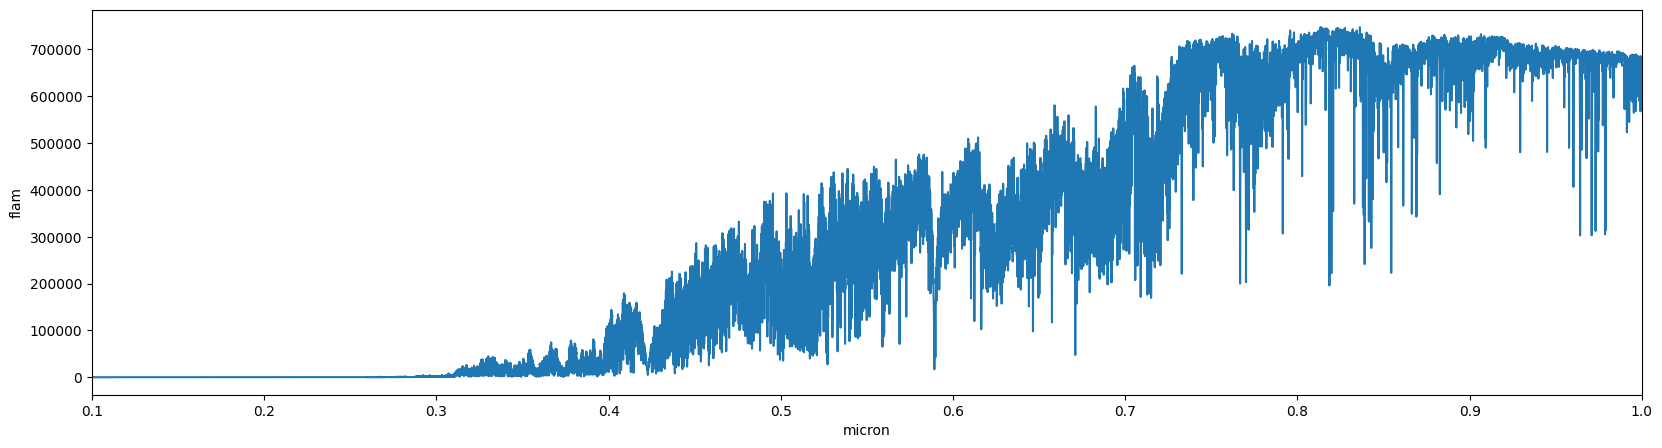

Fixing cross sections...: 100%|██████████| 5/5 [00:12<00:00,  2.46s/it]


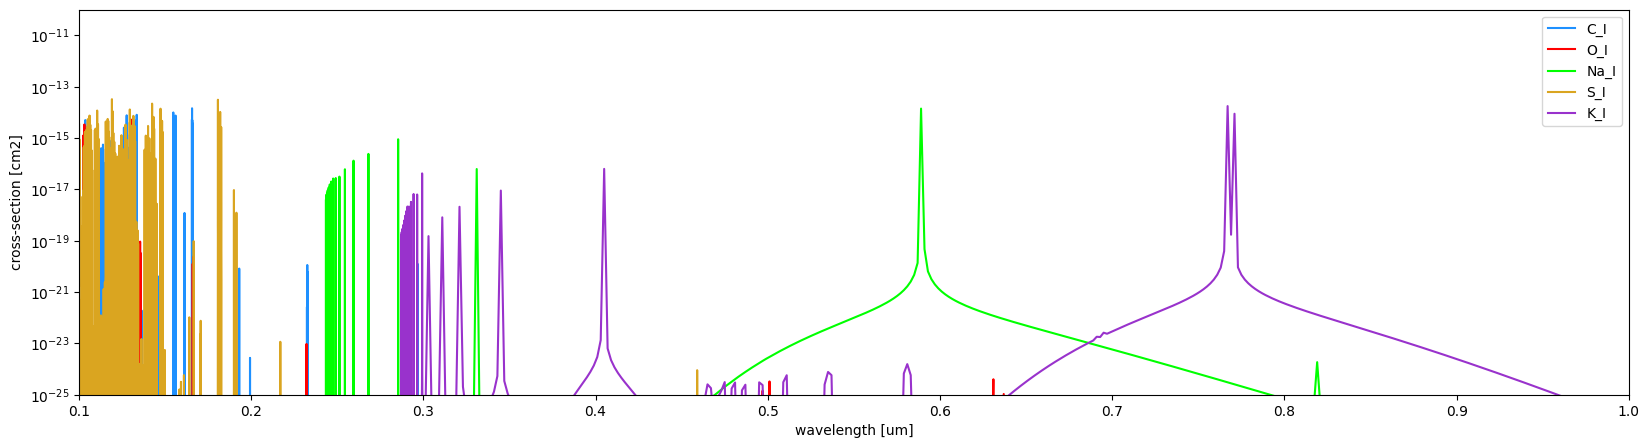

Computing absorption...:  40%|████      | 2/5 [00:00<00:00,  7.79it/s]

C_I 0.0 0.1538610725426105
O_I 0.0 0.1604563827050751


Computing absorption...:  80%|████████  | 4/5 [00:00<00:00,  8.50it/s]

Na_I 2.317650466895792e-278 0.1603727208385478
S_I 0.0 0.16830947646714176


Computing absorption...: 100%|██████████| 5/5 [00:00<00:00,  8.36it/s]


K_I 4.309303029698059e-135 0.1605507131230713


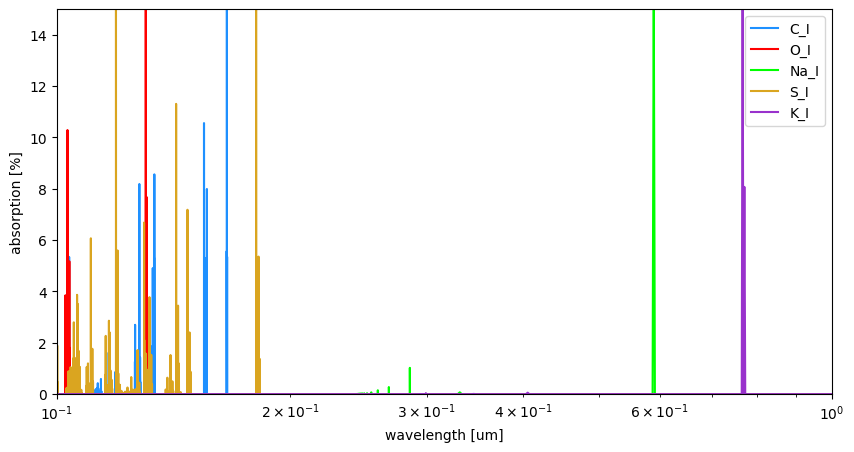

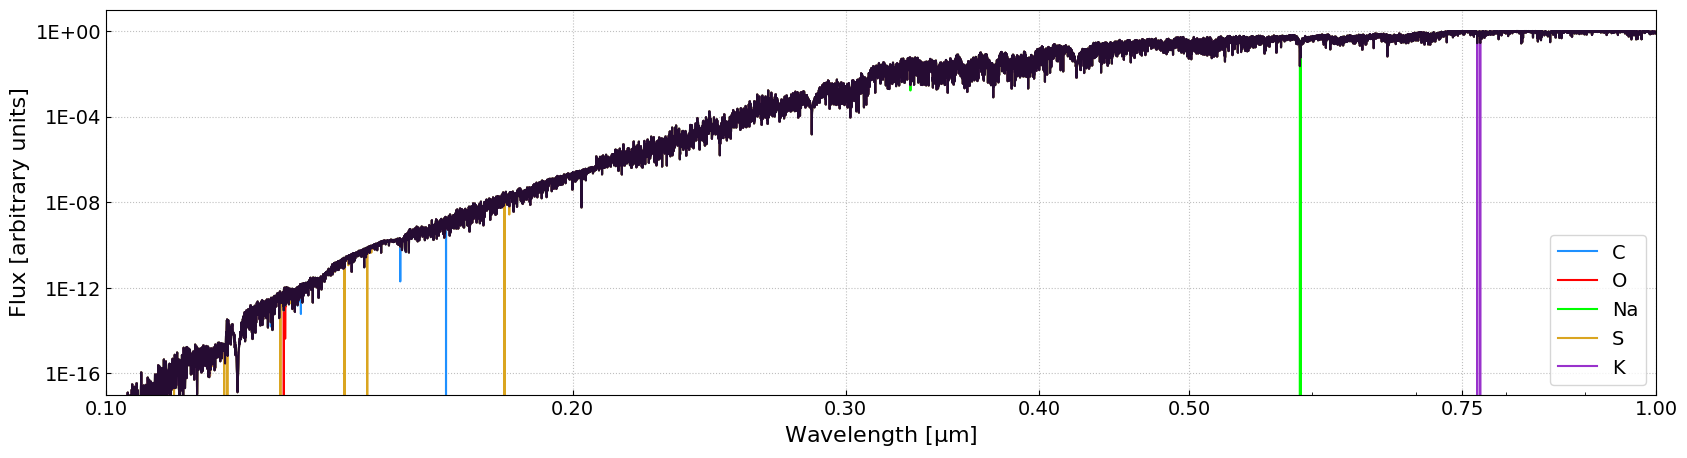

In [61]:
M, Teff, logg = (-0.01, 3522, 4.77) # Goffo+ 2023 stellar parameters

# Use pysynphot to get the phoenix model for GJ 367 A
sp = S.Icat('phoenix', Teff, M, logg)
# angstrom to micron
sp.convert('micron')
plt.figure(figsize=(20,5))
plt.plot(sp.wave,sp.flux)
plt.xlabel(sp.waveunits)
plt.ylabel(sp.fluxunits)
plt.xlim(0.1,1.00)
plt.show()
plt.close()

# Truncate flux to our range of interest and normalize it
flux = sp.flux
wave = sp.wave
ok = (wave>0.1) & (wave<10)
fluxGJ = flux[ok]/np.max(flux[ok])
waveGJ = wave[ok]

# For each species, need to get its scale height
# And we need to interpolate the PHOENIX model onto this grid
from scipy.interpolate import interp1d
interpolated = False
full_cross_dict_H = {}
bin_cross_dict_H = {}
plt.figure(figsize=(20,5))
colors = ('dodgerblue','red','lime','goldenrod','darkorchid')
colors_dict = {}
for spec, color in zip(list(full_cross_dict.keys()),colors):
    colors_dict[spec] = color
for spec in tqdm(list(full_cross_dict.keys()),
                desc='Fixing cross sections...'):
    wave, sigma, mass = full_cross_dict[spec]
    wave = np.array([i for i in list(reversed(wave))])
    sigma = np.array([i for i in list(reversed(sigma))])

    h = scale_height(T=Teff,m=mass*amu,Omega=2*pi/(day*51.3))

    full_cross_dict_H[spec] = [wave,sigma,h]
    
    if not interpolated:
        interpolater = interp1d(waveGJ,fluxGJ,fill_value=0,bounds_error=False)
        new_flux = interpolater(wave)
        waveGJ = wave
        fluxGJ = new_flux
        interpolated = True
    
    wave, sigma, mass = bin_cross_dict[spec]
    bin_cross_dict_H[spec] = [wave,sigma,h]

    plt.plot(wave,sigma,label=spec,color=colors_dict[spec])
plt.legend()
plt.xlabel('wavelength [um]')
plt.ylabel('cross-section [cm2]')
plt.yscale('log')
plt.xlim(0.10, 1.00)
plt.ylim(1e-25,1e-10)
plt.show()
plt.close()

# Recall that f = Ncol ds = n sigma 3 H
# We have h for each species and sigma for each wavelength for each species
# n was determined in the cell above, let's go get it
for n_dens, name in zip(n_denses, new_names):
    if name == 'GJ 367 b':
        number_densities = n_dens
ndens_dict = {}
for i, key in enumerate(list(absorption_dict.keys())):
    ndens_dict[key] = number_densities[i]

# Now that we have gotten n for each species, we can get f.
modified_flux = np.copy(fluxGJ)
mod_fluxes = []
plt.figure(figsize=(10,5))
for spec in tqdm(list(absorption_dict.keys()),
                desc='Computing absorption...'):
    wave, sigma, h = full_cross_dict_H[spec]
    n_dens = ndens_dict[spec]
    f = 1 - (n_dens * sigma * 3 * h)
    f[f<0] = 0
    mod_fluxes.append(modified_flux*f)

    wave, sigma, h = bin_cross_dict_H[spec]
    bin_f = (n_dens * sigma * 3 * h)
    bin_f[bin_f<0] = 0
    print(spec,np.min(bin_f),np.max(bin_f))

    plt.plot(wave,100*bin_f,label=spec,color=colors_dict[spec]) # plot the absorption of each species by wavelength
plt.legend()
plt.xlabel('wavelength [um]')
plt.ylabel('absorption [%]')
plt.xscale('log')
plt.xlim(0.10, 1.00)
plt.ylim(0.0,15.0)
plt.show()
plt.close()


fig, ax = plt.subplots(figsize=(20,5))
for mod_flux,spec in zip(mod_fluxes,list(full_cross_dict.keys())):
    ax.plot(waveGJ,mod_flux,ls='-',color=colors_dict[spec],label=str.replace(spec,"_I",""))
ax.plot(waveGJ,fluxGJ,ls='-',color='k',alpha=0.75)
ax.legend(loc='lower right',fontsize=fontsize_tick)

# Making the plot pretty
ax.set_yscale('log')
ax.set_ylim(1e-17,10)
yt = [1e-16,1e-12,1e-8,1e-4,1]
ax.set_yticks(yt)
ax.set_yticklabels(['{:.0E}'.format(f) for f in yt])

ax.set_xscale('log')
ax.set_xlim(0.1,1.0)
xt = [0.1,0.2,0.3,0.4,0.5,0.75,1.00]
ax.set_xticks(xt)
ax.set_xticklabels(['{:.2F}'.format(f) for f in xt])

from matplotlib.ticker import NullFormatter as nf
ax.tick_params(which='both',axis='both',direction='in',labelsize=fontsize_tick)
ax.xaxis.set_minor_formatter(nf())
ax.set_xlabel(r'Wavelength [$\mu$m]',fontsize=fontsize_axis)
ax.set_ylabel('Flux [arbitrary units]',fontsize=fontsize_axis)
plt.rc('grid',color='grey',alpha=0.5,ls=':')
plt.grid()

plt.savefig('gj367_plot.png'.format(M),
            dpi=300,bbox_inches='tight')

plt.show()
plt.close()

Computing absorption...: 100%|██████████| 5/5 [00:00<00:00, 200.62it/s]


0.002000466771573839
-9.996999016589903e-06
column density of C_I: 1.06E+13 cm-2
[0.100005   0.100015   0.100025   ... 0.99499897 0.99699887 0.99899934]
0.0 0.10000500033319164
0.002000466771573839
-9.996999016589903e-06
column density of O_I: 3.05E+13 cm-2
[0.100005   0.100015   0.100025   ... 0.99499897 0.99699887 0.99899934]
0.0 0.10000500033319164
0.002000466771573839
-9.996999016589903e-06
column density of Na_I: 1.14E+13 cm-2
[0.100005   0.100015   0.100025   ... 0.99499897 0.99699887 0.99899934]
2.317650466895792e-278 0.10521500272845935
0.002000466771573839
-9.996999016589903e-06
column density of S_I: 5.15E+12 cm-2
[0.100005   0.100015   0.100025   ... 0.99499897 0.99699887 0.99899934]
0.0 0.10013500209287941
0.002000466771573839
-9.996999016589903e-06
column density of K_I: 9.12E+12 cm-2
[0.100005   0.100015   0.100025   ... 0.99499897 0.99699887 0.99899934]
4.309303029698059e-135 0.11422499887655527


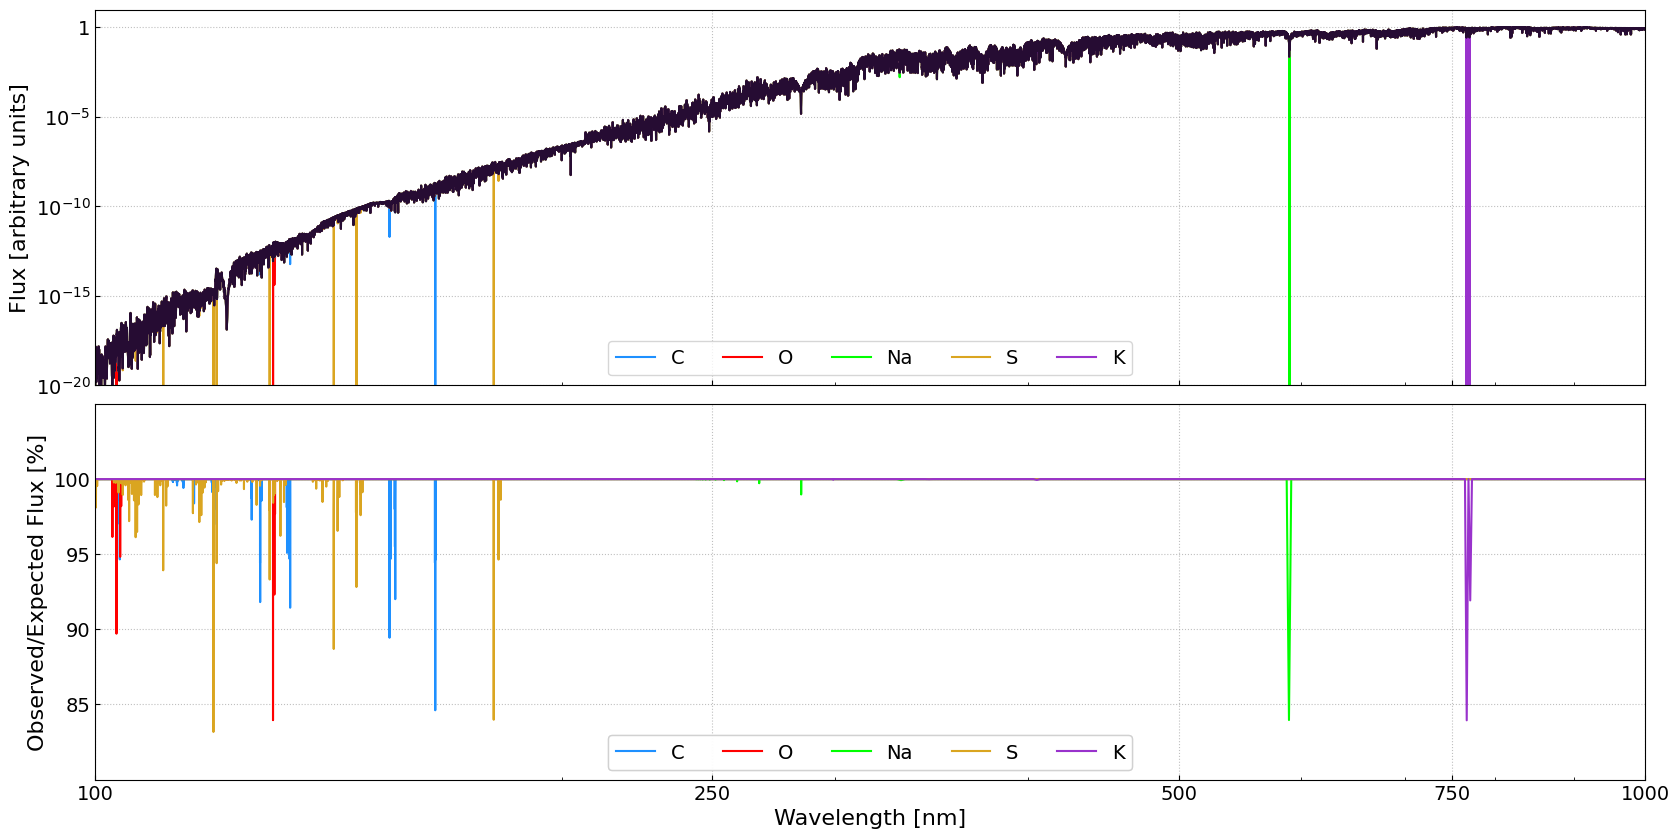

In [75]:
# Now that we have gotten n for each species, we can get f.
from matplotlib.ticker import NullFormatter as nf
colors = ('dodgerblue','red','lime','goldenrod','darkorchid')
colors_dict = {}
for spec, color in zip(('C','O','Na','S','K'),colors):
    colors_dict[spec] = color

absorptions = {}
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(20,10),sharex=True)
plt.subplots_adjust(hspace=0.05)
for mod_flux,spec in zip(mod_fluxes,list(full_cross_dict.keys())):
    ax[0].plot(waveGJ,mod_flux,ls='-',color=colors_dict[str.replace(spec,"_I","")],label=str.replace(spec,"_I",""))
ax[0].plot(waveGJ,fluxGJ,ls='-',color='k',alpha=0.75)
ax[0].legend(loc='lower center',fontsize=fontsize_tick, ncols=5)

# Making the plot pretty
ax[0].set_yscale('log')
ax[0].set_ylim(1e-20,10)
yt = [1e-20,1e-15,1e-10,1e-5,1]
ax[0].set_yticks(yt)
ax[0].set_yticklabels([r'$10^{-20}$',r'$10^{-15}$',r'$10^{-10}$',r'$10^{-5}$','1'])

ax[0].set_xscale('log')
ax[0].set_xlim(0.1,1.0)
xt = [0.1,0.2,0.3,0.4,0.5,0.75,1.00]
ax[0].set_xticks(xt)
ax[0].set_xticklabels([''.format(f) for f in xt])

from matplotlib.ticker import NullFormatter as nf
ax[0].tick_params(which='both',axis='both',direction='in',labelsize=fontsize_tick)
ax[0].xaxis.set_minor_formatter(nf())
ax[0].set_xlabel('',fontsize=fontsize_axis)
ax[0].set_ylabel('Flux [arbitrary units]',fontsize=fontsize_axis)
plt.rc('grid',color='grey',alpha=0.5,ls=':')
ax[0].grid()

'''
ax[1].fill_between(x=[0.1,0.3],y1=0,y2=20,color='white',alpha=0.15)
ax[1].text(0.235,10,s='HST COS + STIS Echelle\nR~10000',
        ha='center',va='center',fontsize=fontsize_tick,
        color='k',path_effects=[pe.withStroke(linewidth=2.25,
                                              foreground='white')])

ax[1].fill_between(x=[0.3,1.0],y1=0,y2=20,color='k',alpha=0.25)
ax[1].text(0.4,10,s='HST STIS + WFC3\nR~100',
        ha='center',va='center',fontsize=fontsize_tick,
        color='k',path_effects=[pe.withStroke(linewidth=2.25,
                                              foreground='white')])
'''

hands = []
for spec in tqdm(list(absorption_dict.keys()),
                desc='Computing absorption...'):
    if spec in ("Na_II","Na_III","K_II","K_III","C_III","O_II","O_III"):
        continue
    wave, sigma, h = bin_cross_dict_H[spec]
    print(wave[-1]-wave[-2])
    print(wave[0]-wave[1])
    ok = (wave>0.1) & (wave<1.0)
    n_dens = ndens_dict[spec]
    f = (n_dens * sigma * 3 * h)
    f[f<0] = 0
    f[f>1] = 1
    print('column density of {}: {:.2E} cm-2'.format(spec,n_dens * 3 * h))
    print(wave)
    mindex = np.argmin(f)
    print(min(f),wave[mindex])
    absorptions[spec] = 1-f

    spec = str.replace(spec,"_",'')
    spec = str.replace(spec,"I",'')
    hand, = ax[1].plot(wave,100*(1-f),label=spec,color=colors_dict[spec]) # plot the absorption of each species by wavelength
    hands.append(hand)

legend1 = ax[1].legend(handles=hands,ncols=5,loc='lower center',fontsize=fontsize_tick)
ax[1].add_artist(legend1)

ax[1].set_xlabel('Wavelength [nm]',fontsize=fontsize_axis)
ax[1].set_ylabel('Observed/Expected Flux [%]',fontsize=fontsize_axis)
#ax[1].set_yticks([5,10,15,20])
ax[1].set_yticks([100,95,90,85])
ax[1].set_xscale('log')
ax[1].set_xlim(0.10, 1.00)
ax[1].set_ylim(80,105)
ax[1].set_xticks([0.1,0.25,0.5,0.75,1.0])
ax[1].set_xticklabels(labels=['100','250','500','750','1000'])
ax[1].tick_params(which='both',axis='both',direction='in',labelsize=fontsize_tick)
ax[1].xaxis.set_minor_formatter(nf())
plt.rc('grid',color='grey',alpha=0.5,ls=':')
ax[1].grid(zorder=1)
plt.savefig('contam_lines_gj.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

And you're done. :)

BONUS: Everything below is for generating the appendix figures.

In [114]:
### MORE EQUATIONS ###
def instel(Teff, aoR):
    return ((Teff/5772)**4)*((aoR/215.032)**-2)

def lumin(Teff, Rs):
    return (Rs**2)*((Teff/5772)**4)

def shore(v):
    return 1e-3*(v**4)

def xuv(I,L):
    return I*(L**-0.6)

In [115]:
### PLOTTING FUNC ###
def plot_thermal_shoreline(names,vescs,instels,rps,tides,Tstar):
    # Establish the template and draw the escape lines.
    x = np.linspace(1,100,1000)
    y = np.linspace(1,10000,1000)
    xs = [6,8,10,15,20,25]
    ys = [0.1,1.0,10.0,100.0,1000.0,10000.0]

    l,h = (20,10)
    fig, ax = plt.subplots(figsize=(l,h))
    theta = 0.335*np.arctan(l/h)*180/np.pi

    shoreline = shore(x)

    ax.plot(x,shoreline,color='red',lw=3,zorder=1)
    ax.text(6.9,2.5,s='VOLATILE-DEPLETED',rotation=theta,
            color='red',weight='bold',fontsize=fontsize_tick)

    # Now start putting in the planets.
    F = 3000
    sizes = np.array(F*np.log10(np.square(np.array(rps))+1))
    re_size = 0.75*F*np.log10(np.square(np.array(1))+1)
    im = ax.scatter(vescs,instels,s=sizes,c=Tstar,cmap=spectral_cmap,edgecolor='blue',lw=3,vmin=2500,vmax=6000)

    im2 = ax.scatter(1e12,1e12,color='None',edgecolor='blue',s=re_size,lw=3,label='High-priority targets')
    im3 = ax.scatter(1e12,1e12,color='blue',marker='x',s=re_size,lw=1,label='GJ 367 b')
    lgnd2 = ax.legend(handles=(im2,im3),loc='lower right',borderpad=1.0,labelspacing=3.0,fontsize=fontsize_tick)

    # Label them.
    for k in range(len(names)):
        if names[k] in best:
            ax.scatter(y=instels[k],x=vescs[k],s=sizes[k],color='blue',marker='x',lw=1)
            ax.scatter(y=instels[k],x=vescs[k],s=sizes[k],color='None',edgecolor='blue',lw=3)
    
        
    # Legend for plot sizes
    labels = ['0.5RE','1.0RE','1.5RE']
    hands = []
    for l in labels:
        hand = ax.scatter(0,1e10,color='white',edgecolors='k',label=l)
        hands.append(hand)
    lgnd = ax.legend(handles=hands,loc='upper center',ncols=3,columnspacing=0.5,handlelength=3,borderpad=2.0,fontsize=fontsize_tick)#edgecolor='white')
    lgnd.legend_handles[0]._sizes = [F*np.log10(0.5**2+1)]
    lgnd.legend_handles[1]._sizes = [F*np.log10(1.0**2+1)]
    lgnd.legend_handles[2]._sizes = [F*np.log10(1.5**2+1)]

    ax.add_artist(lgnd2)
    ax.add_artist(lgnd)
    
    # Make it pretty
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xticks(xs)
    ax.set_xticklabels([str(i) for i in xs])
    ax.set_xlabel('Escape Velocity [km/s]',fontsize=fontsize_axis)    
    ax.set_xlim(6,25)
    ax.set_yticks(ys)
    ax.set_yticklabels([str(i) for i in ys])
    ax.set_ylabel('Instellation [w.r.t. Earth]',fontsize=fontsize_axis)
    for yi in ys:
        ax.axhline(y=yi,color='whitesmoke',zorder=0)
    for xi in xs:
        ax.axvline(x=xi,color='whitesmoke',zorder=0)
    ax.tick_params(axis='both',which='both',direction='in',labelsize=fontsize_tick)
    ax.set_ylim(1,10000)
    cb = plt.colorbar(mappable=im)
    cb.set_label('Stellar Temperature [K]', fontsize=fontsize_axis)
    cb.ax.tick_params(labelsize=fontsize_tick)
    ax.tick_params(which='both',axis='both',direction='in',labelsize=fontsize_tick)

    plt.savefig('thermal_shore.png',dpi=300,bbox_inches='tight')
    plt.close()

In [116]:
### PLOTTING FUNC ###
def plot_xuv_shoreline(names,vescs,instels,rps,tides,Tstar,rstar):
    # Establish the template and draw the escape lines.
    x = np.linspace(1,100,1000)
    y = np.linspace(1,10000,1000)
    xs = [6,8,10,15,20,25]
    ys = [0.1,1.0,10.0,100.0,1000.0,10000.0]

    l,h = (20,10)
    fig, ax = plt.subplots(figsize=(l,h))
    theta = 0.335*np.arctan(l/h)*180/np.pi

    shoreline = shore(x)

    ax.plot(x,shoreline,color='red',lw=3,zorder=1)
    ax.text(6.9,2.5,s='VOLATILE-DEPLETED',rotation=theta,
            color='red',weight='bold',fontsize=fontsize_tick)

    # Now start putting in the planets.
    F = 3000
    sizes = np.array(F*np.log10(np.square(np.array(rps))+1))
    re_size = 0.75*F*np.log10(np.square(np.array(1))+1)
    # Replace instels with XUV
    lumins = lumin(Tstar,rstar)
    instels = xuv(instels,lumins)
    im = ax.scatter(vescs,instels,s=sizes,c=Tstar,cmap=spectral_cmap,edgecolor='blue',lw=3,vmin=2500,vmax=6000)

    im2 = ax.scatter(1e12,1e12,color='None',edgecolor='blue',s=re_size,lw=3,label='High-priority targets')
    im3 = ax.scatter(1e12,1e12,color='blue',marker='x',s=re_size,lw=1,label='GJ 367 b')
    lgnd2 = ax.legend(handles=(im2,im3),loc='lower right',borderpad=1.0,labelspacing=3.0,fontsize=fontsize_tick)

    # Label them.
    for k in range(len(names)):
        if names[k] in best:
            ax.scatter(y=instels[k],x=vescs[k],s=sizes[k],color='blue',marker='x',lw=1)
            ax.scatter(y=instels[k],x=vescs[k],s=sizes[k],color='None',edgecolor='blue',lw=3)
    
        
    # Legend for plot sizes
    labels = ['0.5RE','1.0RE','1.5RE']
    hands = []
    for l in labels:
        hand = ax.scatter(0,1e10,color='white',edgecolors='k',label=l)
        hands.append(hand)
    lgnd = ax.legend(handles=hands,loc='lower center',ncols=3,columnspacing=0.5,handlelength=3,borderpad=2.0,fontsize=fontsize_tick)#edgecolor='white')
    lgnd.legend_handles[0]._sizes = [F*np.log10(0.5**2+1)]
    lgnd.legend_handles[1]._sizes = [F*np.log10(1.0**2+1)]
    lgnd.legend_handles[2]._sizes = [F*np.log10(1.5**2+1)]

    ax.add_artist(lgnd2)
    ax.add_artist(lgnd)
    
    # Make it pretty
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xticks(xs)
    ax.set_xticklabels([str(i) for i in xs])
    ax.set_xlabel('Escape Velocity [km/s]',fontsize=fontsize_axis)    
    ax.set_xlim(6,25)
    ax.set_yticks(ys)
    ax.set_yticklabels([str(i) for i in ys])
    ax.set_ylabel('Cumulative XUV Flux [w.r.t Earth]',fontsize=fontsize_axis)
    for yi in ys:
        ax.axhline(y=yi,color='whitesmoke',zorder=0)
    for xi in xs:
        ax.axvline(x=xi,color='whitesmoke',zorder=0)
    ax.tick_params(axis='both',which='both',direction='in',labelsize=fontsize_tick)
    ax.set_ylim(1,10000)
    cb = plt.colorbar(mappable=im)
    cb.set_label('Stellar Temperature [K]', fontsize=fontsize_axis)
    cb.ax.tick_params(labelsize=fontsize_tick)
    ax.tick_params(which='both',axis='both',direction='in',labelsize=fontsize_tick)

    plt.savefig('xuv_shore.png',dpi=300,bbox_inches='tight')
    plt.close()

In [ ]:
new_names,vescs,instels,new_rps,check_tides,Tstar,rstar,eccs,aors,alfvens,periods = [],[],[],[],[],[],[],[],[],[],[]
for k in range(len(data)):
    try:
        if data['pl_name'][k] == "Io":
            continue
        alfven, tau, tides, aor, teq, V, rp, mp, Teff, ecc_err = process_planet(data,k)
        rs = data['st_rad'][k]
        ecc = data['pl_orbeccen'][k]
        period = data['pl_orbper'][k]
        v = vesc(m=mp*masse,r=rp*rade)/(100*1000)
        i = instel(Teff,aor)
        if alfven < aor:
            print(1/0)
        if tides != 0:
            new_names.append(data['pl_name'][k])
        else:
            print(1/0)
        vescs.append(v)
        instels.append(i)
        check_tides.append(tides)
        new_rps.append(rp)
        Tstar.append(Teff)
        rstar.append(rs)
        eccs.append(ecc)
        aors.append(aor)
        alfvens.append(alfven)
        periods.append(period*day)
    except:
        pass
plot_thermal_shoreline(new_names,np.array(vescs),np.array(instels),np.array(new_rps),np.array(check_tides),np.array(Tstar))
plot_xuv_shoreline(new_names,np.array(vescs),np.array(instels),np.array(new_rps),np.array(check_tides),np.array(Tstar),np.array(rstar))